<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

## Notes:

use statsmodel, and sklearn

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
# A:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
df = pd.read_csv(sac_csv)

In [3]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
df.groupby('city')

In [5]:
# A:
df.info()
# no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


##### check zip

In [6]:
df.sort_values('zip',ascending=True).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
468,2231 COUNTRY VILLA CT,AUBURN,95603,CA,2,2,1255,Condo,Mon May 19 00:00:00 EDT 2008,260000,38.931671,-121.097862
484,220 OLD AIRPORT RD,AUBURN,95603,CA,2,2,960,Multi-Family,Mon May 19 00:00:00 EDT 2008,285000,38.939802,-121.054575
325,1740 HIGH ST,AUBURN,95603,CA,3,3,0,Residential,Tue May 20 00:00:00 EDT 2008,504000,38.891935,-121.084340
852,820 DANA CT,AUBURN,95603,CA,4,3,0,Residential,Fri May 16 00:00:00 EDT 2008,560000,38.865246,-121.094869
833,1484 RADCLIFFE WAY,AUBURN,95603,CA,4,3,2278,Residential,Fri May 16 00:00:00 EDT 2008,420454,38.935579,-121.079018


In [7]:
df.sort_values('sq__ft',ascending=False).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858
534,5201 BLOSSOM RANCH DR,ELK GROVE,95757,CA,4,4,4303,Residential,Mon May 19 00:00:00 EDT 2008,450000,38.399436,-121.444041
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5,3,4246,Residential,Mon May 19 00:00:00 EDT 2008,452000,38.628955,-121.529269
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4,3,3992,Residential,Tue May 20 00:00:00 EDT 2008,460000,38.403609,-121.335541


Zip has no issues.

##### check state

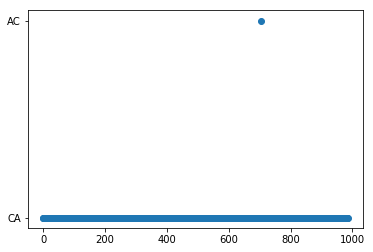

In [8]:
plt.scatter(df.index,df['state'])

In [9]:
df[df['state']=='AC'].count()

street       1
city         1
zip          1
state        1
beds         1
baths        1
sq__ft       1
type         1
sale_date    1
price        1
latitude     1
longitude    1
dtype: int64

In [10]:
df[df['state']=='AC']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [11]:
df[df['zip']==95835].head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
40,4800 WESTLAKE PKWY Unit 2109,SACRAMENTO,95835,CA,2,2,1304,Condo,Wed May 21 00:00:00 EDT 2008,152000,38.658812,-121.542345
77,391 NATALINO CIR,SACRAMENTO,95835,CA,2,2,1341,Residential,Wed May 21 00:00:00 EDT 2008,221000,38.673070,-121.506373
98,230 CANDELA CIR,SACRAMENTO,95835,CA,3,2,1541,Residential,Wed May 21 00:00:00 EDT 2008,260000,38.656251,-121.547572
117,4727 SAVOIE WAY,SACRAMENTO,95835,CA,5,3,2800,Residential,Wed May 21 00:00:00 EDT 2008,304037,38.658182,-121.549521
137,5579 JERRY LITELL WAY,SACRAMENTO,95835,CA,5,3,3599,Residential,Wed May 21 00:00:00 EDT 2008,381300,38.677126,-121.500519


1 row has state wrongly entered as AC instead of CA. Correct it.

##### check beds, baths

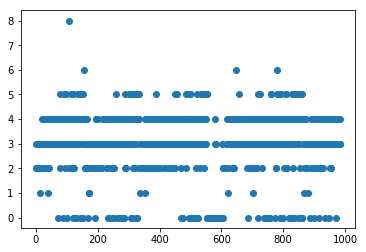

In [12]:
plt.scatter(df.index,df['beds'])

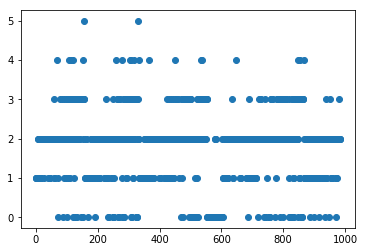

In [13]:
plt.scatter(df.index,df['baths'])

In [14]:
df.sort_values('beds',ascending=True).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
604,113 RINETTI WAY,RIO LINDA,95673,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,30000,38.687172,-121.463933
570,96 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886024,-121.289859
571,100 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886091,-121.289744
743,6288 LONETREE BLVD,ROCKLIN,95765,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,250000,38.804993,-121.293609


In [15]:
df.sort_values('baths',ascending=True).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
591,47 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884638,-121.289893
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436
599,15 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885571,-121.289421
598,19 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885376,-121.289414
597,23 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885181,-121.289406


Lots of entries with 0 beds and 0 baths, which is quite impossible. Drop them.

##### check sq__ft

Text(0, 0.5, 'sq__ft')

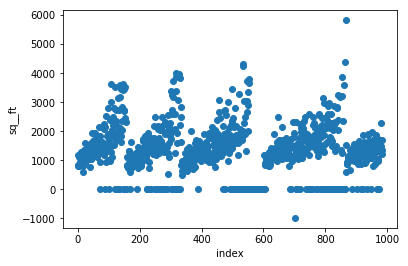

In [16]:
plt.scatter(df.index,df['sq__ft'])
plt.xlabel('index')
plt.ylabel('sq__ft')

In [17]:
df.sort_values('sq__ft',ascending=True).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433
492,2513 OLD KENMARE RD,LINCOLN,95648,CA,5,3,0,Residential,Mon May 19 00:00:00 EDT 2008,304000,38.847396,-121.259586
559,40 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884535,-121.289619
558,36 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884599,-121.289406
557,32 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884741,-121.289390


In [18]:
df[df['sq__ft']==0].count()

street       171
city         171
zip          171
state        171
beds         171
baths        171
sq__ft       171
type         171
sale_date    171
price        171
latitude     171
longitude    171
dtype: int64

Lots of entries (171 out of a total of 985 entries) with size 0 sq__ft which is quite impossible. Drop them.

1 outlier/anomalous pt: -984 sqft. Change it to +ve.

##### check price

Text(0, 0.5, 'price')

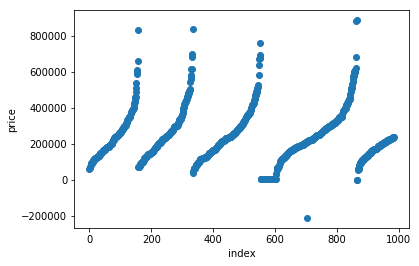

In [19]:
plt.scatter(df.index,df['price'])
plt.xlabel('index')
plt.ylabel('price')

In [20]:
df.sort_values('price',ascending=True).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433
865,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,0,Residential,Fri May 16 00:00:00 EDT 2008,1551,38.851645,-121.231742
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337
580,59 E ST,LINCOLN,95648,CA,3,2,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885794,-121.290281
584,386 1ST ST,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886528,-121.288869


1 outlier/anomalous pt: price -$210944. Remove its -ve sign.

##### check date

In [21]:
df['sale_date'].head()

0    Wed May 21 00:00:00 EDT 2008
1    Wed May 21 00:00:00 EDT 2008
2    Wed May 21 00:00:00 EDT 2008
3    Wed May 21 00:00:00 EDT 2008
4    Wed May 21 00:00:00 EDT 2008
Name: sale_date, dtype: object

In [22]:
df['sale_year'] = pd.to_datetime(df['sale_date']).dt.year    #extract the year, mth into separate cols
df['sale_mth'] = pd.to_datetime(df['sale_date']).dt.month    
df['sale_dayofweek'] = pd.to_datetime(df['sale_date']).dt.dayofweek #extract the mon-sun (monday=0)
df['sale_day'] = pd.to_datetime(df['sale_date']).dt.day     #extract the day of the mth

C:\Users\Dell\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [23]:
df['sale_date'].unique()

array(['Wed May 21 00:00:00 EDT 2008', 'Tue May 20 00:00:00 EDT 2008',
       'Mon May 19 00:00:00 EDT 2008', 'Fri May 16 00:00:00 EDT 2008',
       'Thu May 15 00:00:00 EDT 2008'], dtype=object)

Datetimes look correct.

##### check long lat

Text(0, 0.5, 'lat')

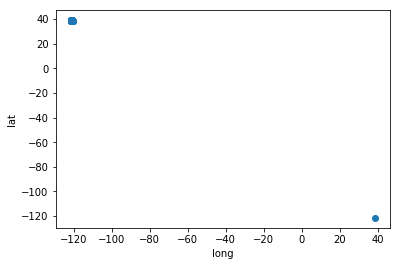

In [24]:
plt.scatter(df['longitude'],df['latitude'])
plt.xlabel('long')
plt.ylabel('lat')

In [25]:
df.sort_values('longitude',ascending=False).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_year,sale_mth,sale_dayofweek,sale_day
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433,2008,5,4,16
663,2250 FOREBAY RD,POLLOCK PINES,95726,CA,3,1,1320,Residential,Fri May 16 00:00:00 EDT 2008,175000,38.774910,-120.597599,2008,5,4,16
102,5615 LUPIN LN,POLLOCK PINES,95726,CA,3,2,1380,Residential,Wed May 21 00:00:00 EDT 2008,265000,38.708315,-120.603872,2008,5,2,21
106,2900 BLAIR RD,POLLOCK PINES,95726,CA,2,2,1284,Residential,Wed May 21 00:00:00 EDT 2008,280908,38.754850,-120.604760,2008,5,2,21
844,4320 FOUR SEASONS RD,PLACERVILLE,95667,CA,3,2,0,Residential,Fri May 16 00:00:00 EDT 2008,475000,38.690867,-120.693641,2008,5,4,16


In [26]:
df.sort_values('latitude',ascending=True).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_year,sale_mth,sale_dayofweek,sale_day
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433,2008,5,4,16
174,1121 CREEKSIDE WAY,GALT,95632,CA,3,1,1080,Residential,Tue May 20 00:00:00 EDT 2008,106716,38.241514,-121.312199,2008,5,1,20
372,201 CARLO CT,GALT,95632,CA,3,2,1080,Residential,Mon May 19 00:00:00 EDT 2008,122000,38.242270,-121.310320,2008,5,0,19
820,14004 WALNUT AVE,WALNUT GROVE,95690,CA,3,1,1727,Residential,Fri May 16 00:00:00 EDT 2008,380000,38.247659,-121.515129,2008,5,4,16
63,404 6TH ST,GALT,95632,CA,3,1,1479,Residential,Wed May 21 00:00:00 EDT 2008,188741,38.251808,-121.302493,2008,5,2,21


1 outlier/anomalous pt: long/lat values were swapped. Flip them.

##### cleaning all...

In [27]:
df = df[(df.beds != 0) & (df.baths != 0)]    #drop rows with beds n baths=0
df = df[df.sq__ft != 0]                     #drop rows with sq__ft=0
df = df[df.price != 0]                     #drop rows with price=0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 16 columns):
street            814 non-null object
city              814 non-null object
zip               814 non-null int64
state             814 non-null object
beds              814 non-null int64
baths             814 non-null int64
sq__ft            814 non-null int64
type              814 non-null object
sale_date         814 non-null object
price             814 non-null int64
latitude          814 non-null float64
longitude         814 non-null float64
sale_year         814 non-null int64
sale_mth          814 non-null int64
sale_dayofweek    814 non-null int64
sale_day          814 non-null int64
dtypes: float64(2), int64(9), object(5)
memory usage: 108.1+ KB


In [28]:
df.loc[703,'state'] = 'CA'              #corrected to CA
df.loc[703,'sq__ft'] = 984              #converted to positive
df.loc[703,'price'] = 210944            #converted to positive
df.loc[703,'latitude'] = 38.668433      #flipped with longitude
df.loc[703,'longitude'] = 121.503471
df.loc[703,:]

street                        1900 DANBROOK DR
city                                SACRAMENTO
zip                                      95835
state                                       CA
beds                                         1
baths                                        1
sq__ft                                     984
type                                     Condo
sale_date         Fri May 16 00:00:00 EDT 2008
price                                   210944
latitude                               38.6684
longitude                              121.503
sale_year                                 2008
sale_mth                                     5
sale_dayofweek                               4
sale_day                                    16
Name: 703, dtype: object

In [29]:
df[df.zip ==95838]    #street matters, as there can be many streets in 1 zip code

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_year,sale_mth,sale_dayofweek,sale_day
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2008,5,2,21
10,645 MORRISON AVE,SACRAMENTO,95838,CA,3,2,909,Residential,Wed May 21 00:00:00 EDT 2008,100309,38.637663,-121.451520,2008,5,2,21
48,3820 NATOMA WAY,SACRAMENTO,95838,CA,4,2,1656,Residential,Wed May 21 00:00:00 EDT 2008,166357,38.636748,-121.422159,2008,5,2,21
180,211 MCDANIEL CIR,SACRAMENTO,95838,CA,3,2,1110,Residential,Tue May 20 00:00:00 EDT 2008,123750,38.636565,-121.460383,2008,5,1,20
185,604 MORRISON AVE,SACRAMENTO,95838,CA,2,1,952,Residential,Tue May 20 00:00:00 EDT 2008,134000,38.637678,-121.452476,2008,5,1,20
186,648 SANTA ANA AVE,SACRAMENTO,95838,CA,3,2,1211,Residential,Tue May 20 00:00:00 EDT 2008,135000,38.658478,-121.450409,2008,5,1,20
226,4899 WIND CREEK DR,SACRAMENTO,95838,CA,4,2,1799,Residential,Tue May 20 00:00:00 EDT 2008,205000,38.655887,-121.446119,2008,5,1,20
277,405 MARLIN SPIKE WAY,SACRAMENTO,95838,CA,3,2,1411,Residential,Tue May 20 00:00:00 EDT 2008,296769,38.657830,-121.456842,2008,5,1,20
340,3924 HIGH ST,SACRAMENTO,95838,CA,2,1,796,Residential,Mon May 19 00:00:00 EDT 2008,65000,38.638797,-121.435049,2008,5,0,19
345,3845 ELM ST,SACRAMENTO,95838,CA,3,1,1250,Residential,Mon May 19 00:00:00 EDT 2008,84000,38.637337,-121.432835,2008,5,0,19


In [30]:
df['street_name'] = df['street'].str.extract(pat = '\w+\s+(\w+)')         #extract 1 word after the first set of numbers
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_year,sale_mth,sale_dayofweek,sale_day,street_name
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2008,5,2,21,HIGH
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,2008,5,2,21,OMAHA
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,2008,5,2,21,BRANCH
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,2008,5,2,21,JANETTE
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,2008,5,2,21,MCMAHON
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,2008,5,2,21,PEPPERMILL
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,2008,5,2,21,OGDEN
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,2008,5,2,21,19TH
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,2008,5,2,21,TRINITY
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,2008,5,2,21,10TH


In [31]:
df.info()
# everything looks correct now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 17 columns):
street            814 non-null object
city              814 non-null object
zip               814 non-null int64
state             814 non-null object
beds              814 non-null int64
baths             814 non-null int64
sq__ft            814 non-null int64
type              814 non-null object
sale_date         814 non-null object
price             814 non-null int64
latitude          814 non-null float64
longitude         814 non-null float64
sale_year         814 non-null int64
sale_mth          814 non-null int64
sale_dayofweek    814 non-null int64
sale_day          814 non-null int64
street_name       814 non-null object
dtypes: float64(2), int64(9), object(6)
memory usage: 154.5+ KB


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [32]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_year,sale_mth,sale_dayofweek,sale_day,street_name
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2008,5,2,21,HIGH
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,2008,5,2,21,OMAHA
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,2008,5,2,21,BRANCH
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,2008,5,2,21,JANETTE
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,2008,5,2,21,MCMAHON


In [33]:
df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS',
       'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'LINCOLN',
       'CAMERON PARK', 'ROCKLIN', 'LOOMIS', 'AUBURN', 'EL DORADO HILLS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'DIAMOND SPRINGS', 'COOL',
       'WALNUT GROVE', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [34]:
df['state'].unique()

array(['CA'], dtype=object)

In [35]:
df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [36]:
df['sale_date'].unique()    #mths, years are constantly 2008. can ignore year as a variable

array(['Wed May 21 00:00:00 EDT 2008', 'Tue May 20 00:00:00 EDT 2008',
       'Mon May 19 00:00:00 EDT 2008', 'Fri May 16 00:00:00 EDT 2008',
       'Thu May 15 00:00:00 EDT 2008'], dtype=object)

##### Variables that qualify as price predictors:

'street_name', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type', 'sale_dayofweek', 'sale_day'

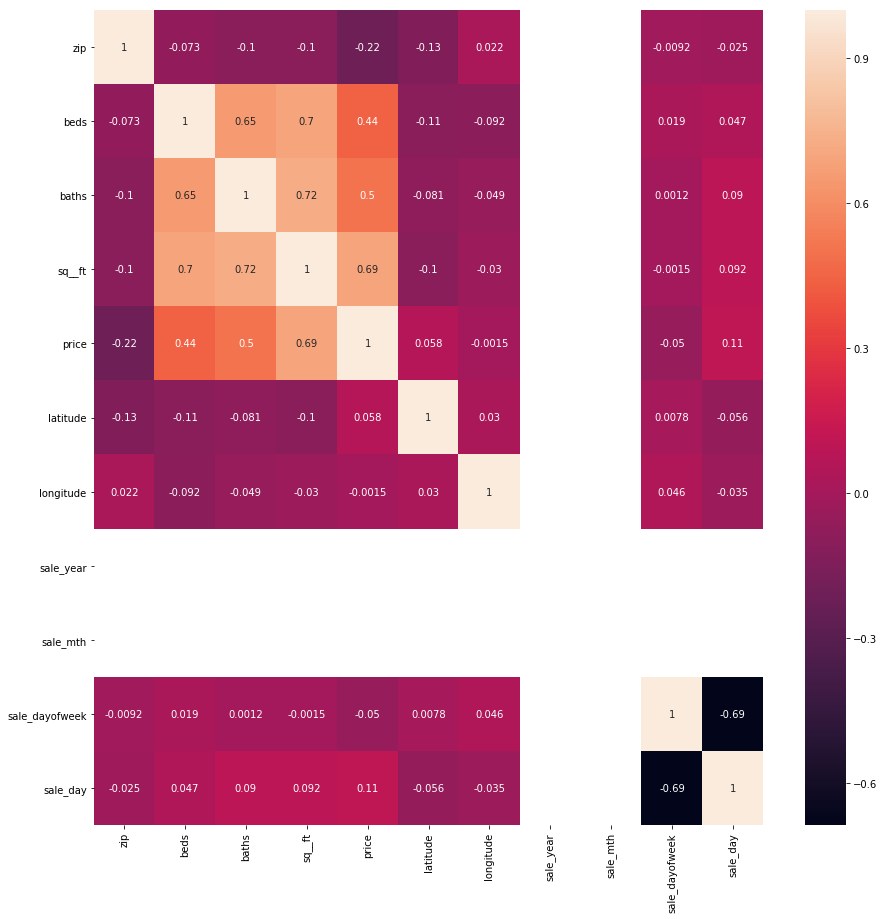

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True) ;   #annot=True to display correlation values in heatmap

sq__ft has the highest corr (0.69) with price. Then baths (0.5), then beds (0.44).

dayofweek and day don't have any correlation with price.

Regardless, lets plot for all other variables.

'city'

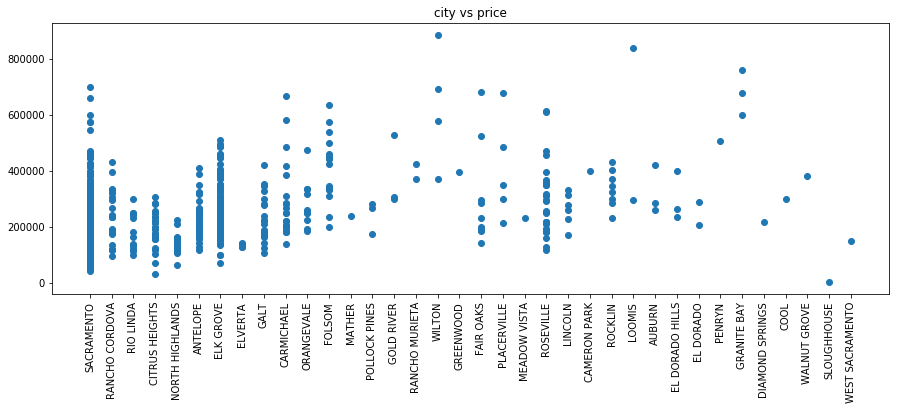

In [38]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['city'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('city vs price');

'zip'

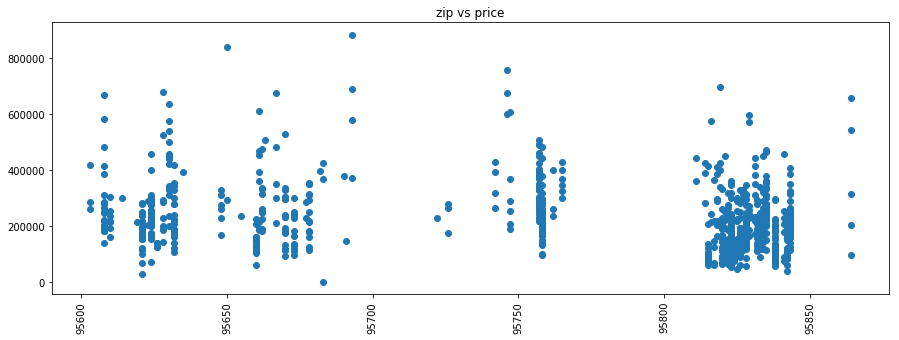

In [39]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['zip'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('zip vs price');

'state'

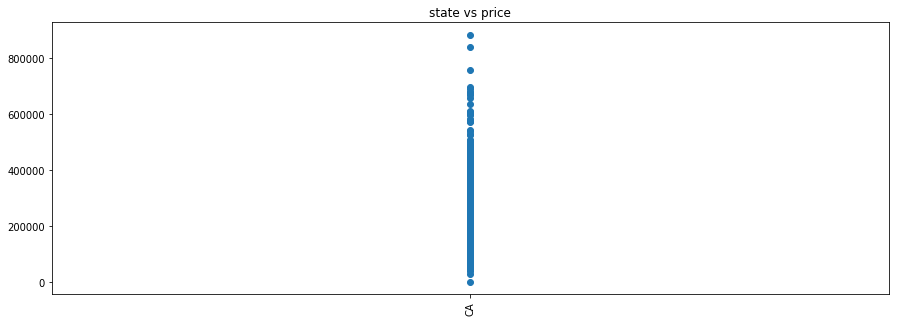

In [40]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['state'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('state vs price');

'beds'

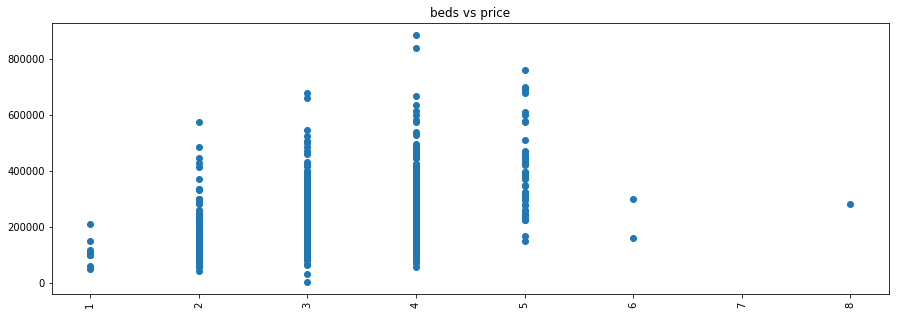

In [41]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['beds'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('beds vs price');

'baths'

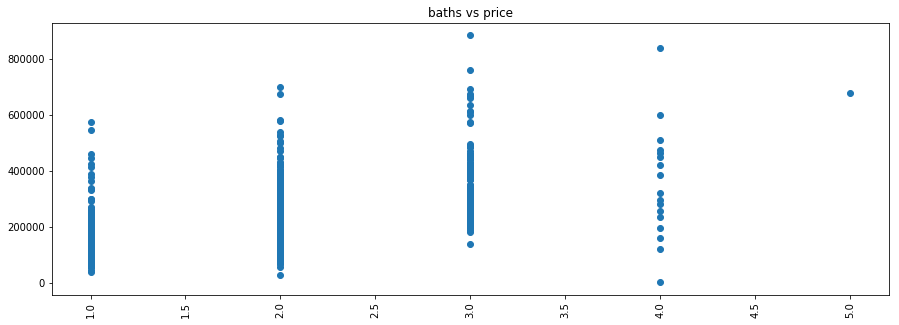

In [42]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['baths'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('baths vs price');

'sq__ft'

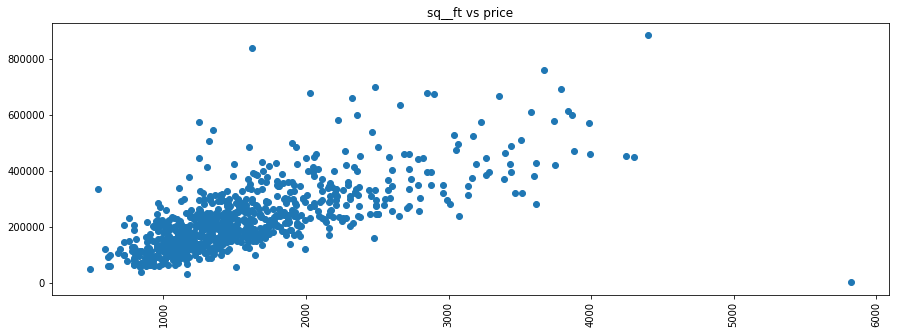

In [43]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['sq__ft'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('sq__ft vs price');

'type'

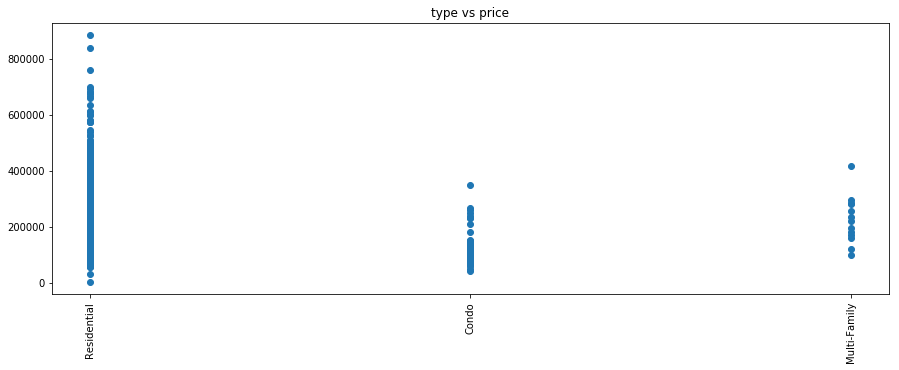

In [44]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['type'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('type vs price');

 'sale_dayofweek'

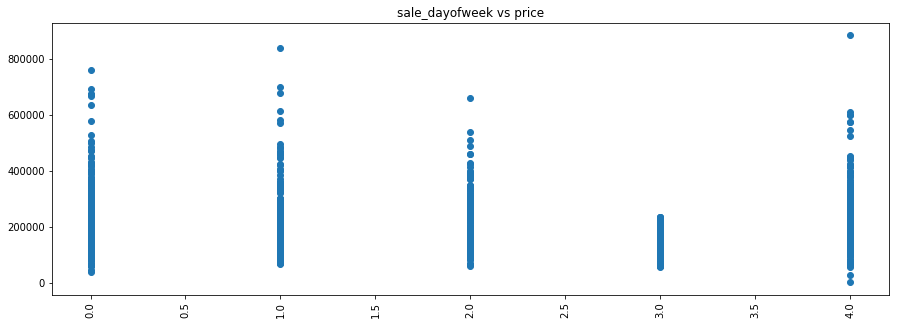

In [45]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['sale_dayofweek'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('sale_dayofweek vs price');

 'sale_day'

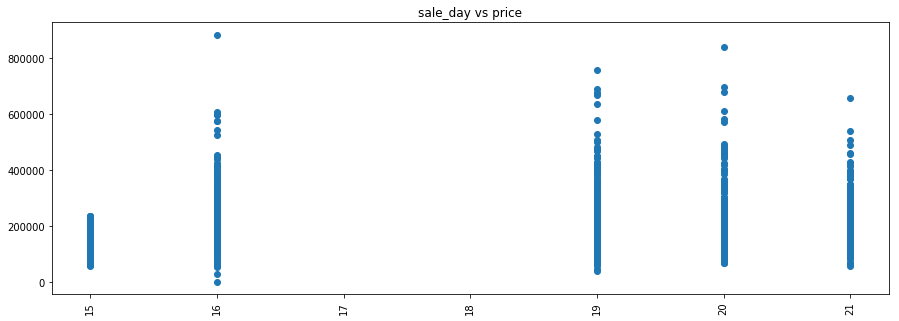

In [46]:
# A:
plt.figure(figsize=(15,5))
plt.scatter(df['sale_day'],df['price'])
plt.xticks(rotation=90);    #semicolon is to suppress xtixk label outputs
plt.title('sale_day vs price');

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [47]:
df.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

# A:

sq__ft
1. it has a somewhat linear relationship to price.
2. it has the highest corr (0.69) with price


### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [48]:
from sklearn.linear_model import LinearRegression

X = df[['sq__ft']].values
y = df['price']
linreg = LinearRegression(fit_intercept=True)    #"fit intercept = false" means, assume y-intercept = 0
linreg.fit(X, y)

print(linreg.coef_)
print(linreg.intercept_)
y_hat = linreg.coef_*X + linreg.intercept_    #eqn for predicted y values (y_hat)

[125.21648668]
30210.633866919146


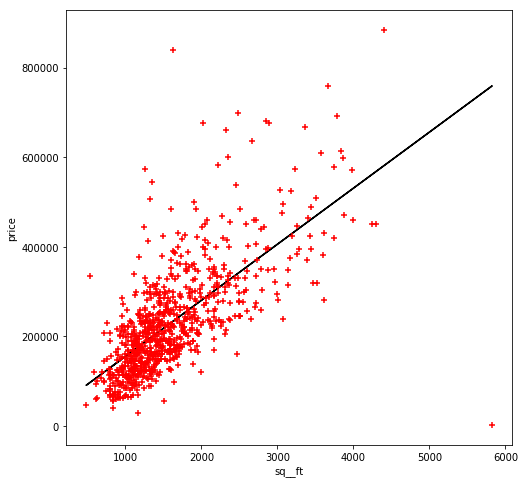

In [49]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(X, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("sq__ft")
plt.ylabel("price")

plt.plot(X, y_hat, c = 'k')
# looks like a pretty good fit!

### 6. Interpret the intercept. Interpret the slope.

# A:

intercept is the base price of a house, disregarding the sq__ft variable.

slope is how much the price changes, per unit increase in sq__ft.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

# A:

Prediction: make use of sq__ft, to predict housing price

Inference: make use of housing price, to infer sq__ft

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

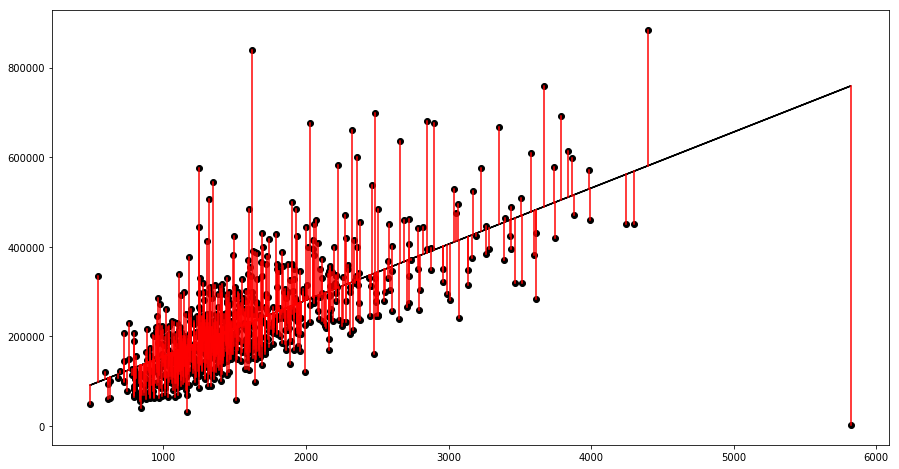

In [50]:
# A:
df['y_hat'] = linreg.intercept_ + linreg.coef_ * df['sq__ft']
df['y_resid'] = df['price'] - df['y_hat']

# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=df['sq__ft'], y=df['price'], c='k')
ax.plot(df['sq__ft'], df['y_hat'], color='k');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['y_hat']), 'r-')

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [51]:
# A:
df = pd.get_dummies(df, columns=['type'])   #create dummy columns
df.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,...,sale_year,sale_mth,sale_dayofweek,sale_day,street_name,y_hat,y_resid,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,...,2008,5,2,21,HIGH,134891.616731,-75669.616731,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,...,2008,5,2,21,OMAHA,176338.273822,-108126.273822,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,...,2008,5,2,21,BRANCH,129882.957264,-61002.957264,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,...,2008,5,2,21,JANETTE,136895.080518,-67588.080518,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,...,2008,5,2,21,MCMAHON,130008.173751,-48108.173751,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 9a) Then again, if in future, there is an unexpected 8th category (not mon-sun, but Funday), then the above wouldn't work. Cos we may wrongly think that a value of 0 means its Sunday, when it could have been Funday

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [52]:
# A:
# no need cos ive removed all unknowns from the 'type' category

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [64]:
# A:
from sklearn.linear_model import LinearRegression

# Mean = 1315
# STD = 853
# Huge Houses > 3775 sq ft
df['huge_house'] = np.where(df.sq__ft > 3775, 1, 0)
X = df[['sq__ft','beds','type_Residential','huge_house']].values
y = df['price']

# fit lr model onto X,y
model = LinearRegression().fit(X,y)

# see coefficients
print(model.coef_)

# build prediction eqn
prediction = model.predict(X)

[   142.93054131 -16569.51997358  37917.13331809 -68584.01961677]


### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

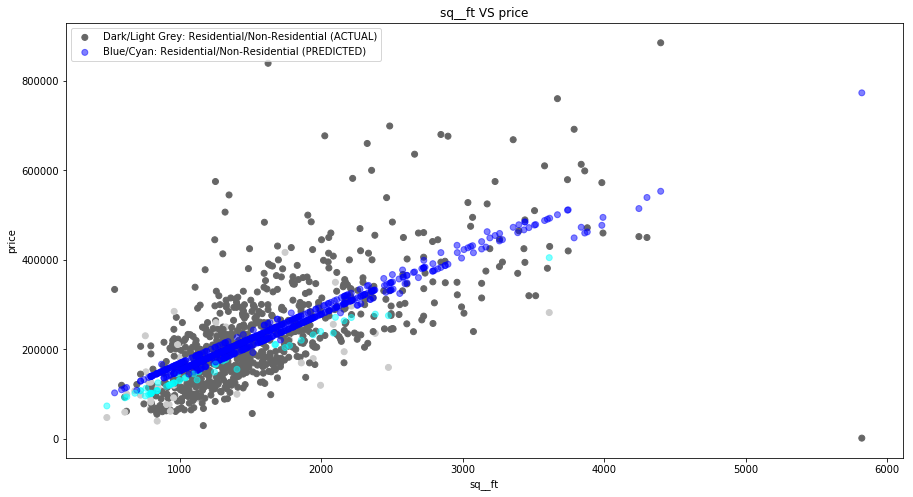

In [54]:
# A:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
col = np.where(df['type_Residential']==1,'0.4','0.8')
ax.scatter(x=df['sq__ft'], y=df['price'], c=col)
col = np.where(df['type_Residential']==1,'b','cyan')
ax.scatter(x=df['sq__ft'], y=prediction, c=col, alpha=0.5)
plt.title('sq__ft VS price')
plt.xlabel('sq__ft')
plt.ylabel('price')
plt.legend(['Dark/Light Grey: Residential/Non-Residential (ACTUAL)','Blue/Cyan: Residential/Non-Residential (PREDICTED)'])

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

# A:

1. Linearity: Y must have an approximately linear relationship with each independent X_i.

Not met. Beds was used as a variable. But as seen from graph below, y (price) does not seem to vary linearly with the X variable (beds).

However, y (price) does seem to vary linearly with the X variable (sq__ft).

Text(0, 0.5, 'price')

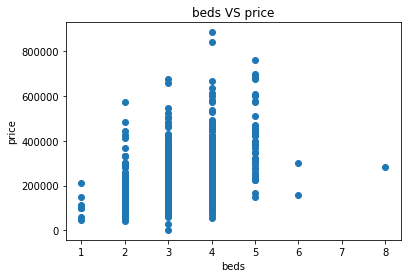

In [55]:
plt.scatter(df['beds'],df['price'])
plt.title('beds VS price')
plt.xlabel('beds')
plt.ylabel('price')

2. Normality: The errors (residuals) follow a Normal distribution.

Met. As seen from the graph below, there is a somewhat normal distribution of the y_resid. 

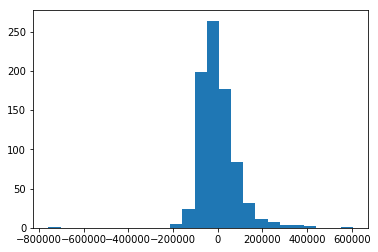

In [70]:
plt.hist(df['y_resid'], bins=25);

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [71]:
# A:
import statsmodels.api as sm

X = df[['sq__ft','beds','type_Residential','huge_house']].values
y = df['price']

# manually add the intercept column:
X = sm.add_constant(X)

model = sm.OLS(y, X)
model = model.fit()
prediction = model.predict()
model.summary()

# on hindsight, the constant has a high p-value (>0.05), hence should be discarded.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 17 Nov 2019   Prob (F-statistic):          7.04e-118
Time:                        22:26:09   Log-Likelihood:                -10397.
No. Observations:                 814   AIC:                         2.080e+04
Df Residuals:                     809   BIC:                         2.083e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.127e+04   1.47e+04      1.443      0.149   -7659.555    5.02e+04
x1           142.9305      7.135     20.032      0.000     128.925     156.936
x2         -1.657e+04   5130.752     -3.229      0.001   -2.66e+04   -6498.364
x3          3.792e+04   1.23e+04      3.088      0.002    1.38e+04     6.2e+04
x4         -6.858e+04   3.12e+04     -2.197      0.028    -1.3e+05   -7299.700
==============================================================================
Omnibus:                      225.296   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5890.432
Skew:                           0.635   Prob(JB):                         0.00
Kurtosis:                      16.117   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

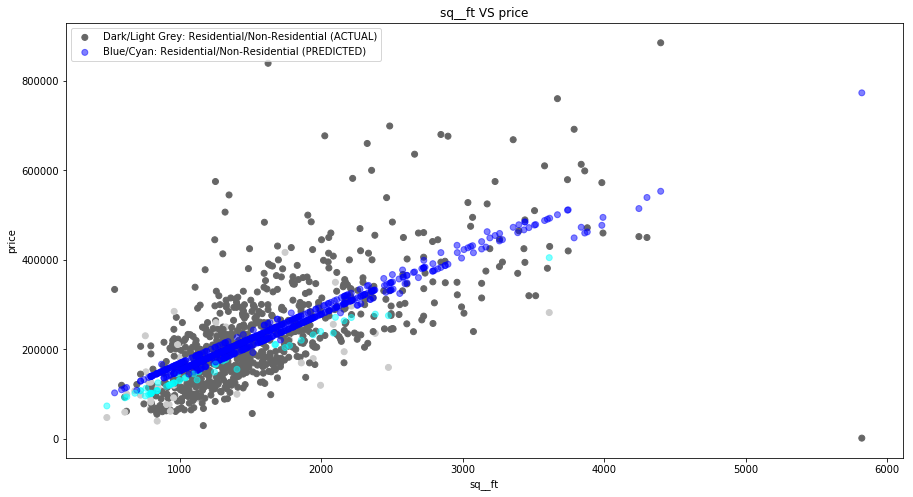

In [58]:
# A:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
col = np.where(df['type_Residential']==1,'0.4','0.8')
ax.scatter(x=df['sq__ft'], y=df['price'], c=col)
col = np.where(df['type_Residential']==1,'b','cyan')
ax.scatter(x=df['sq__ft'], y=prediction, c=col, alpha=0.5)
plt.title('sq__ft VS price')
plt.xlabel('sq__ft')
plt.ylabel('price')
plt.legend(['Dark/Light Grey: Residential/Non-Residential (ACTUAL)','Blue/Cyan: Residential/Non-Residential (PREDICTED)'])

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [59]:
# A:
def r2_adj(X,y):
    model = LinearRegression()    #use a linear reg model
    model = model.fit(X,y)        #fit it onto the variables dataset X and the target dataset y 
    r2 = model.score(X,y)         #get the R^2 value
    r2adj = 1-(1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)    #get the r^2 adj value
    return r2adj
    
r2_adj(X,y)

0.49024099143004973

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [60]:
# A:
from sklearn import metrics

def reg_metrics(y,prediction): 
    EVRSF = metrics.explained_variance_score(y, prediction) #Explained variance regression score function
    MAERL = metrics.mean_absolute_error(y, prediction)      #Mean absolute error regression loss
    MSERL = metrics.mean_squared_error(y, prediction)       #Mean squared error regression loss
    MSLERL = metrics.mean_squared_log_error(y, prediction)  #Mean squared logarithmic error regression loss
    MedAERL = metrics.median_absolute_error(y, prediction)  #Median absolute error regression loss
    R2 = metrics.r2_score(y, prediction)                    #R^2 (coefficient of determination) regression score function.
    print('\nExplained variance regression score function =', EVRSF, 
          '\nMean absolute error regression loss =', MAERL,
          '\nMean squared error regression loss =', MSERL,
          '\nMean squared logarithmic error regression loss =', MSLERL,
          '\nMedian absolute error regression loss =', MedAERL,
          '\nR^2 (coefficient of determination) regression score function =', R2)
    return EVRSF, MAERL, MSERL, MSLERL, MedAERL, R2

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [61]:
# A:
reg_metrics(y, prediction)


Explained variance regression score function = 0.4933760406832475 
Mean absolute error regression loss = 58977.565438176236 
Mean squared error regression loss = 7265255910.120263 
Mean squared logarithmic error regression loss = 0.16496756910933907 
Median absolute error regression loss = 46893.42963759511 
R^2 (coefficient of determination) regression score function = 0.4933760406832475


(0.4933760406832475,
 58977.565438176236,
 7265255910.120263,
 0.16496756910933907,
 46893.42963759511,
 0.4933760406832475)

In [62]:
# remove a variable 'sq__ft'
X = df[['beds','type_Residential','huge_house']].values
y = df['price']

# manually add the intercept column:
X = sm.add_constant(X)

model = sm.OLS(y, X)
model = model.fit()
prediction = model.predict()
reg_metrics(y, prediction)
# Errors are all larger, visible reduction in R2. This is likely a poorer model


Explained variance regression score function = 0.24208533853365477 
Mean absolute error regression loss = 76374.76468382121 
Mean squared error regression loss = 10868897675.134256 
Mean squared logarithmic error regression loss = 0.234065995904656 
Median absolute error regression loss = 59393.56404673756 
R^2 (coefficient of determination) regression score function = 0.24208533853365477


(0.24208533853365477,
 76374.76468382121,
 10868897675.134256,
 0.234065995904656,
 59393.56404673756,
 0.24208533853365477)

### 19. Bias vs. Variance (optional, but good to do)

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [63]:
# A: